## Ejercicio 2 de la Practica Obligatoria de la Unidad 02 del Sprint 08:

Este es el notebook donde he generado las graficas para la presentación del titanic:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway


In [3]:

def compara_categoricas(df, col1, col2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # Creamos la fila inicial
    sns.countplot(x=col1, data=df, ax=axs[0], hue = col1)
    axs[0].set_title(f'Frecuencias Absolutas de {col1}')
    sns.countplot(x=col2, data=df, ax=axs[1], hue = col2)
    axs[1].set_title(f'Frecuencias Absolutas de {col2}')

    # Añadimos la comparativa como una figura adicional (catplot no se puede generar a nivel de AXES, es una Figure ya de por sí.)
    catplot = sns.catplot(x=col1, col=col2, kind="count", data=df, hue = col1)
    catplot.fig.suptitle(f'Catplot de {col1} por {col2}', y = 1.1) # Aumentamos ligeramente la coordenada y (ver docstring de suptitle) para que no se superpongan los letreros       
   
    contingency_table = pd.crosstab(df[col1], df[col2])
    return contingency_table


In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
#Hago un preprocesamiento de la tabla de datos:

df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

df_titanic = df_titanic.drop(columns=["parch", "sibsp"])

moda_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda_embark_town)

df_titanic

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


1- El titanic fue un accidente con una tasa de mortalidad alta.  


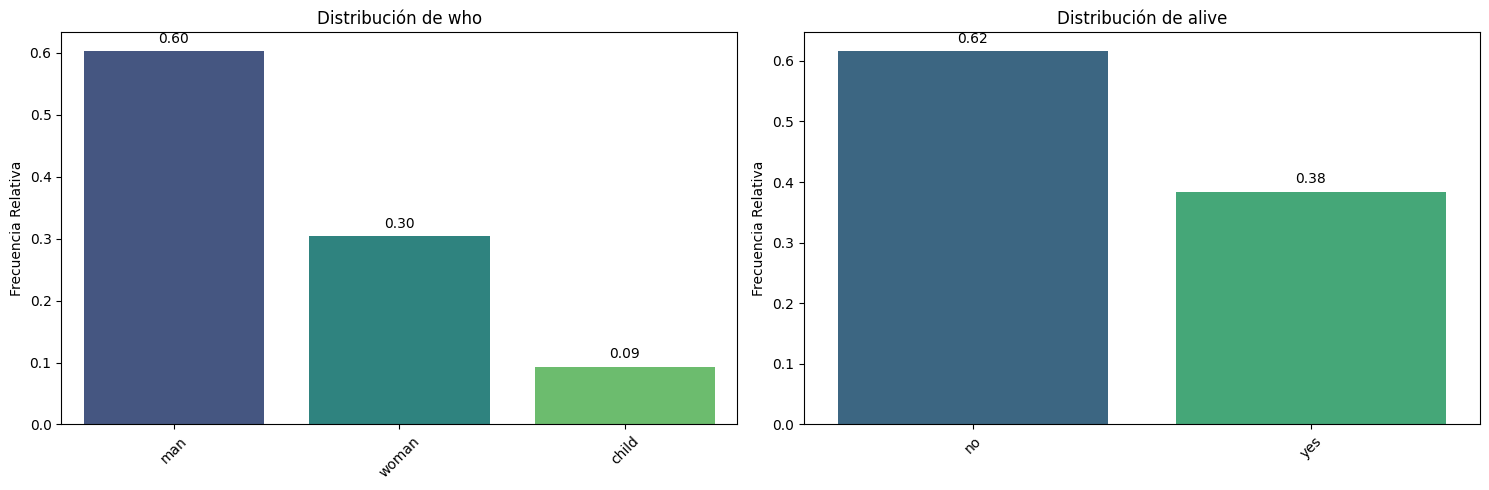

In [6]:
#Para ello con mirar simplemente las frecuencias relativas de las supervivencias en el titanic nos vale:

pinta_distribucion_categoricas(df_titanic,["who","alive"], relativa = True, mostrar_valores= True)

2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  


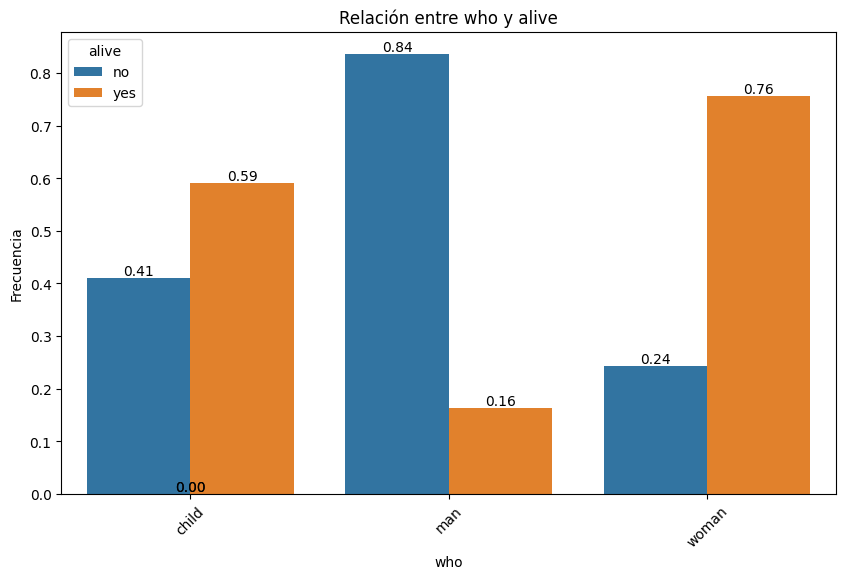

In [7]:
#Aqui vamos a visualizar las variables who vs alive:

plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values = True)

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


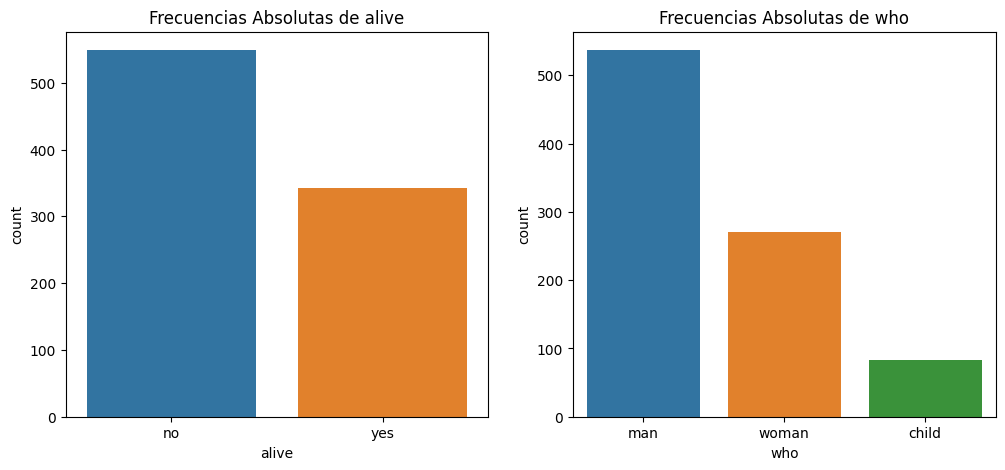

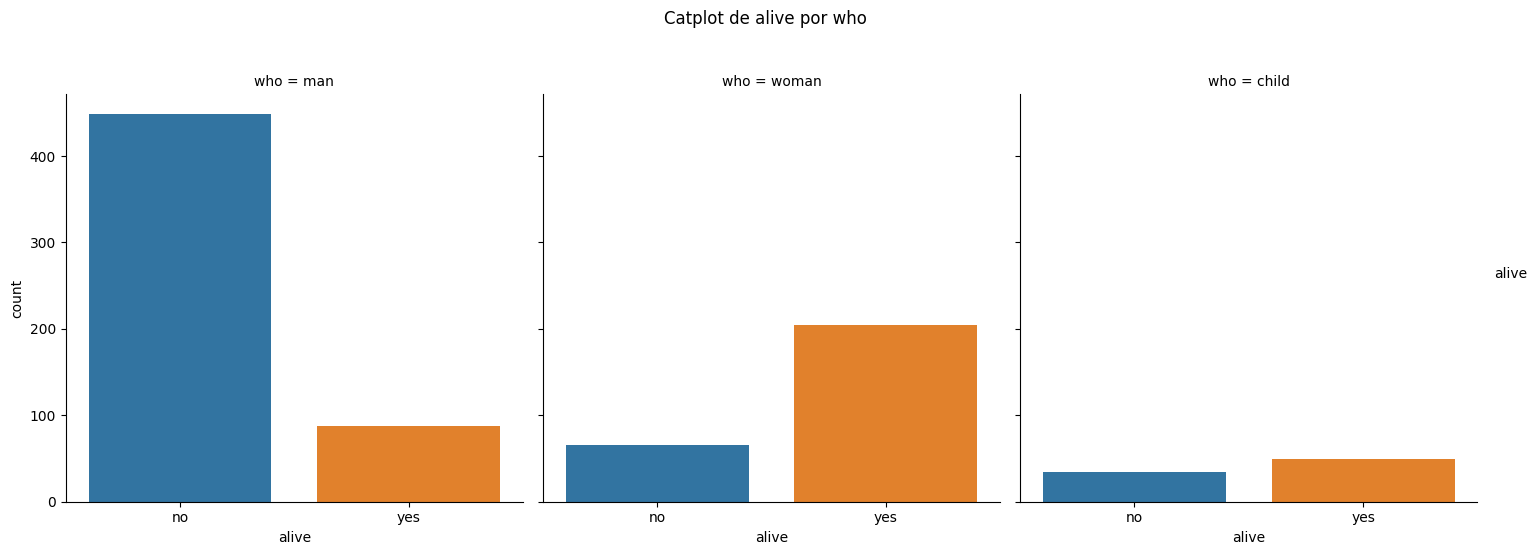

In [8]:
compara_categoricas(df_titanic,"alive","who")

3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  


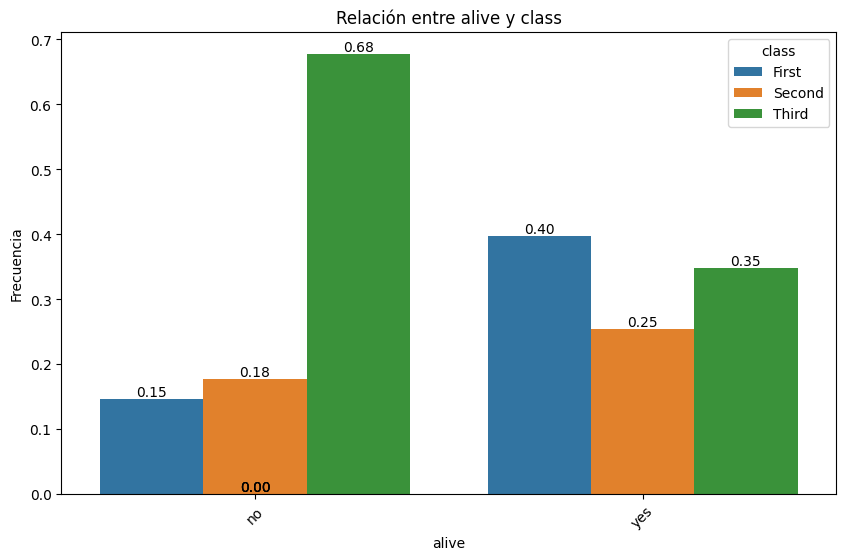

In [9]:
#Aqui vamos a visualizar las variables alive vs pclass

plot_categorical_relationship_fin(df_titanic, "alive","class", relative_freq = True, show_values = True)

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


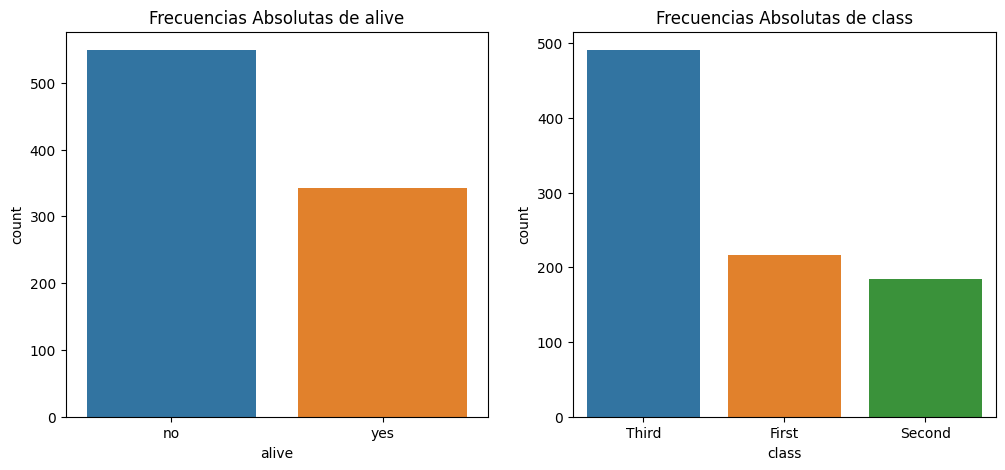

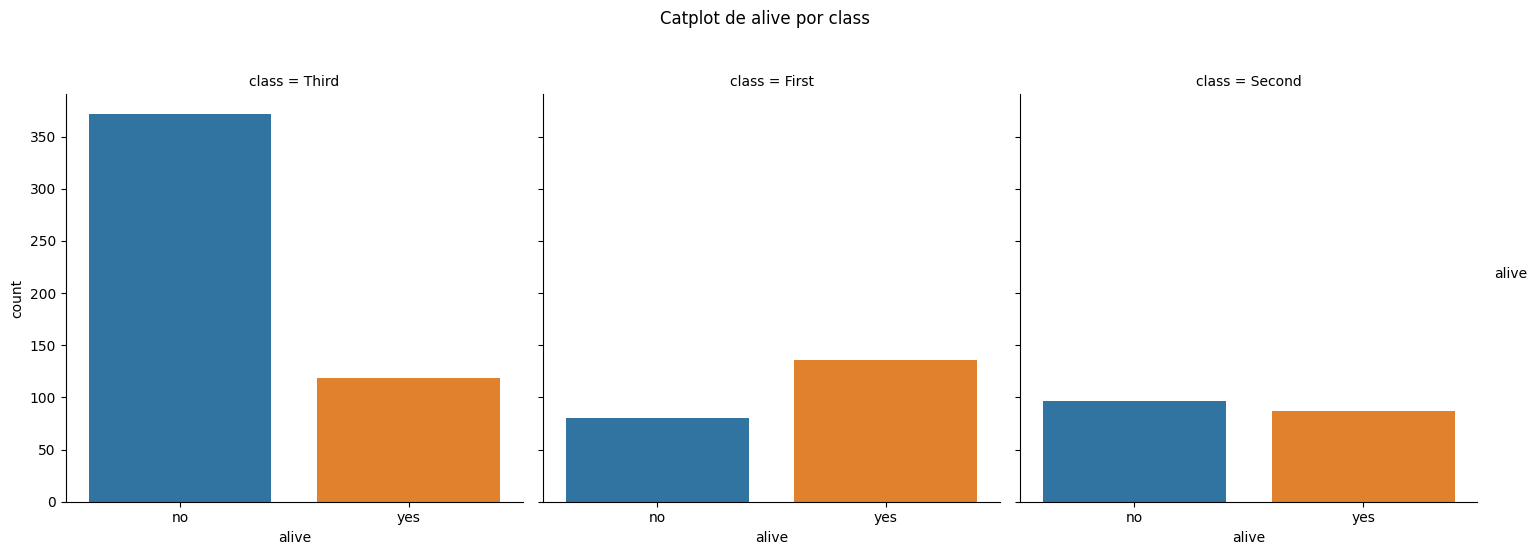

In [10]:
compara_categoricas(df_titanic,"alive","class")

4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    


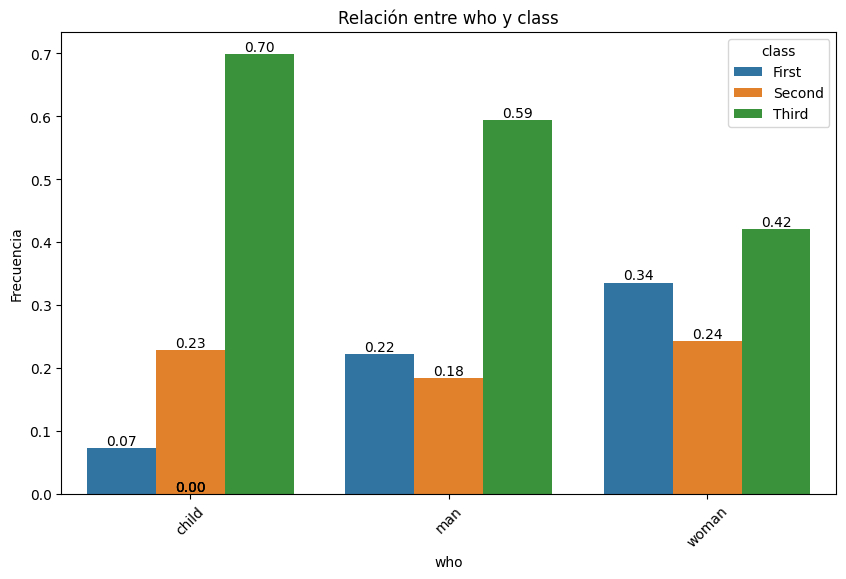

In [11]:
#Aqui vamos a visualizar las variables who vs alive vs pclass

plot_categorical_relationship_fin(df_titanic, "who","class", relative_freq = True, show_values = True)

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


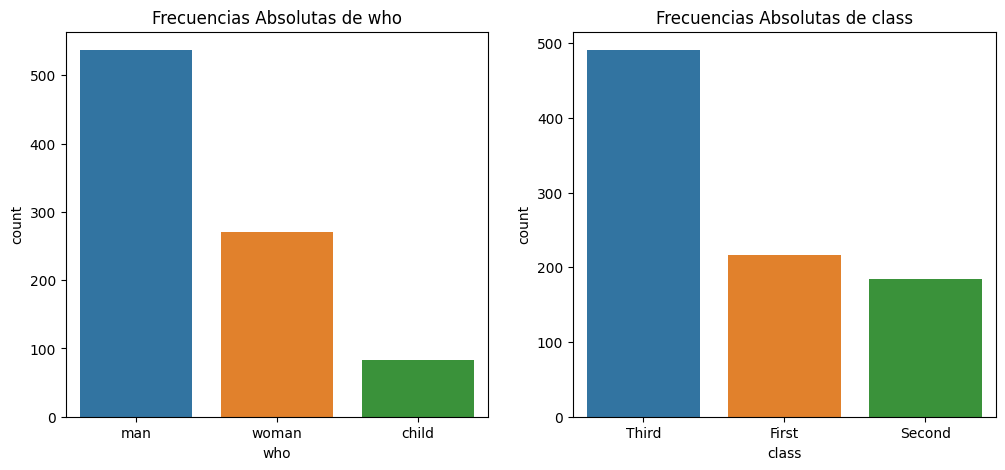

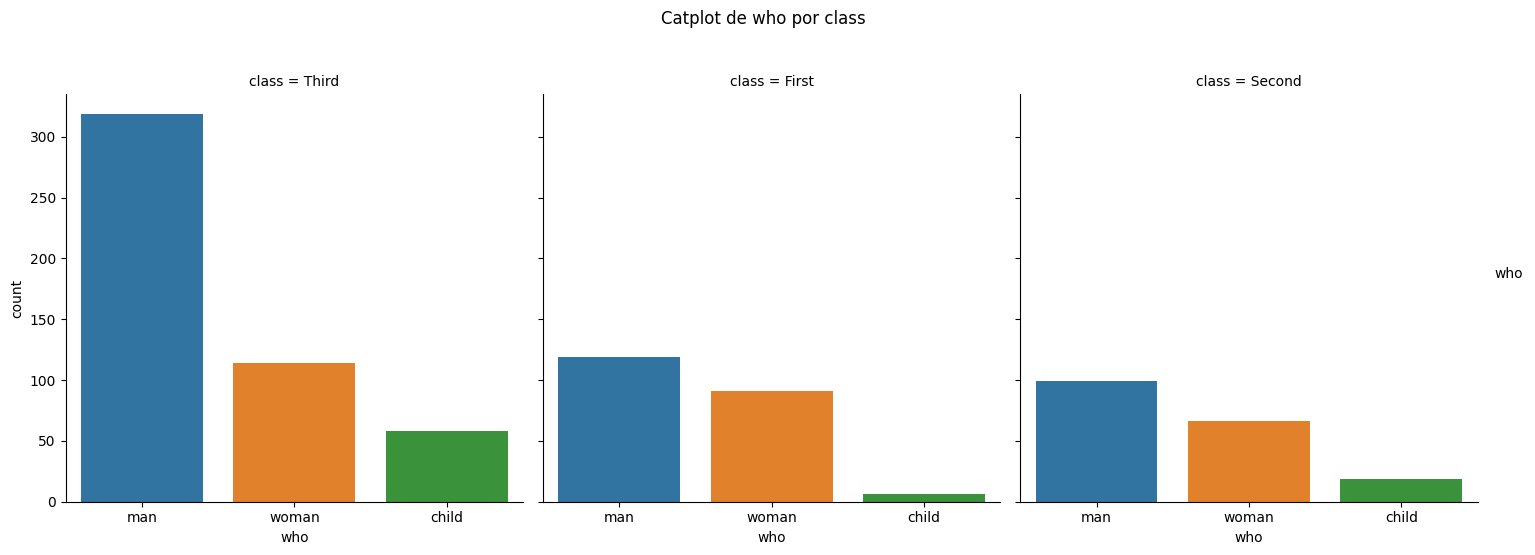

In [12]:
compara_categoricas(df_titanic,"who","class")

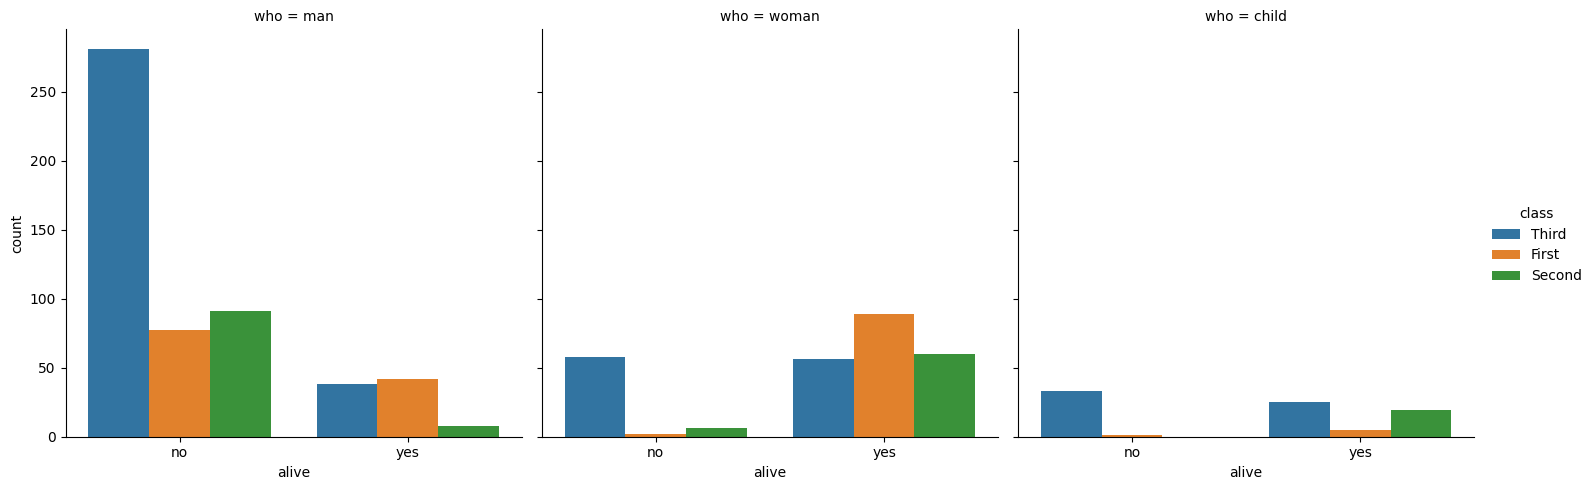

In [13]:
sns.catplot(x= "alive", col = "who", hue = "class", data = df_titanic, kind = "count");

5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

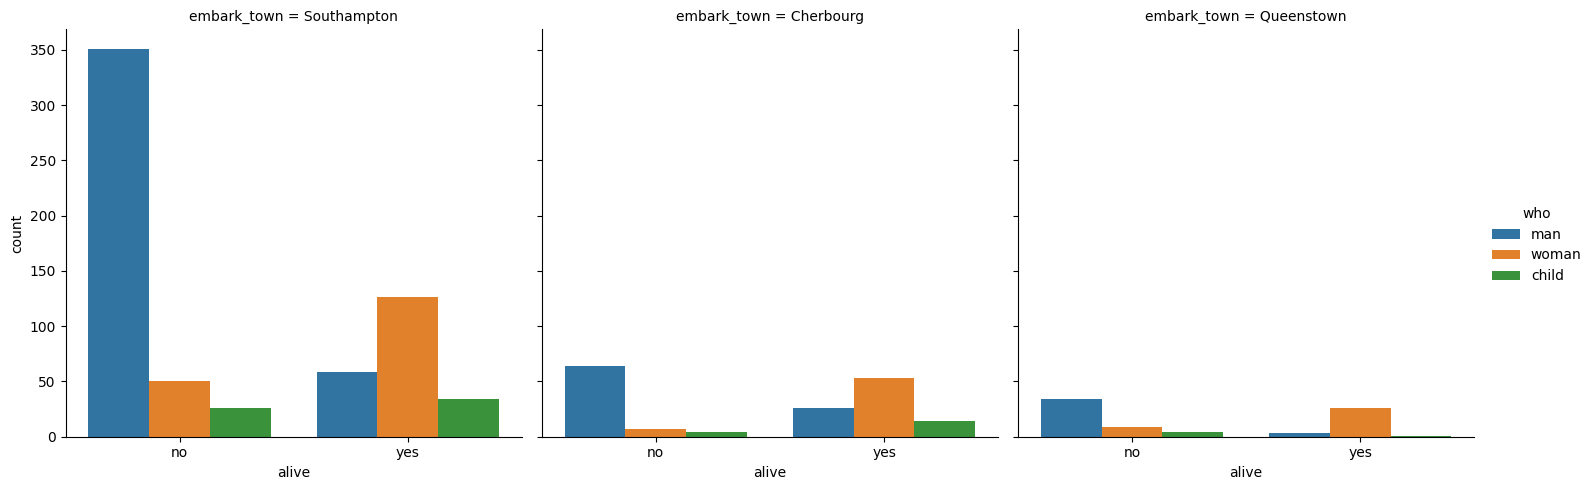

In [18]:
#Aqui vamos a visualizar las variables alive (directora) vs embark_town vs fare (catplot)

sns.catplot(x= "alive", col = "embark_town", hue = "who", data = df_titanic, kind = "count");

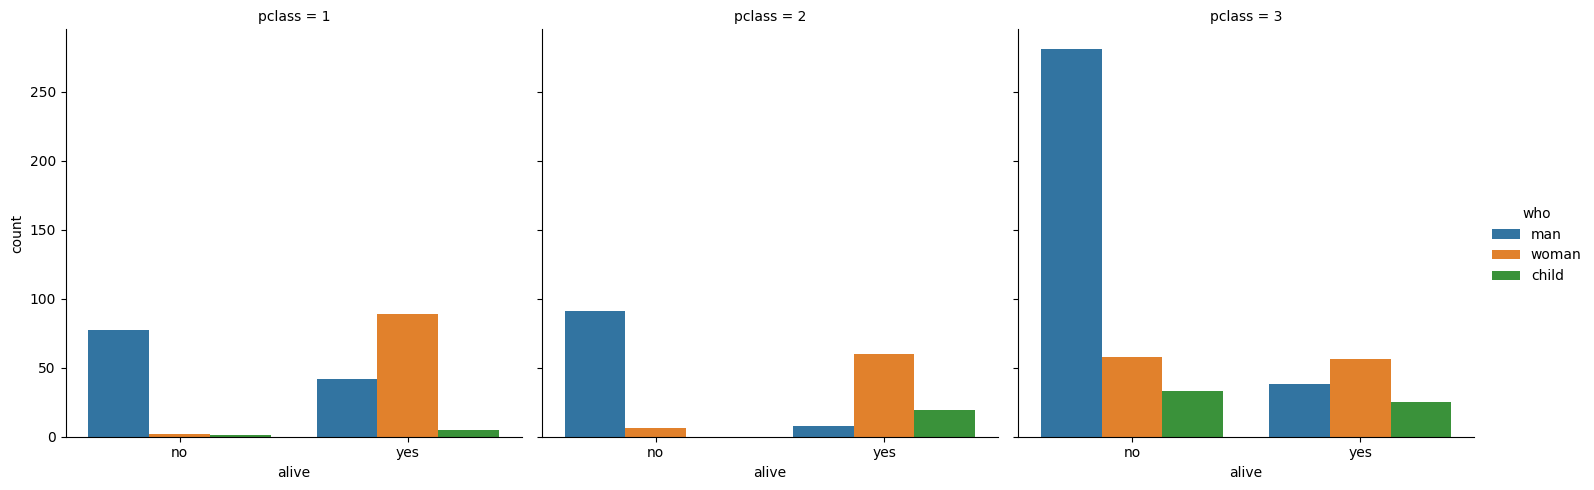

In [23]:
#Aqui vamos a visualizar las variables alive (directora) vs embark_town vs fare (catplot)
sns.catplot(x= "alive", col = "pclass", hue = "who", data = df_titanic, kind = "count");